In [1]:
import csv
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from xgbse.converters import (
    convert_data_to_xgb_format,
    convert_to_structured
)

data = pd.read_csv('../cohort.csv')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [24]:
# splitting
data = data.sample(10000)
X = data.drop(['time', 'event', 'cldl', 'charlson'], axis=1)
y = data
y = convert_to_structured(y['time'], y['event'])

# splitting between train, and validation 
(X_train, X_valid,
 y_train, y_valid) = \
train_test_split(X, y, test_size=0.2, random_state=20)

In [51]:
data['event'].mean()

0.0843

In [54]:
X

,age,men,smoker,p.dm,pas,ct,chdl,tg,htn_med,ckd.epi,c10,hematocrit
64205,75,0,1,0,135.0,201,53,91,1,71.043716,1,46.3
22469,83,1,0,1,139.0,196,32,159,1,59.774244,0,42.4
5123,85,0,0,0,143.0,280,58,107,1,66.224419,0,37.3
30775,79,0,0,0,180.0,237,80,71,0,40.218338,0,41.4
6157,75,0,0,0,115.0,222,68,137,1,85.156231,1,39.6
...,...,...,...,...,...,...,...,...,...,...,...,...
25015,75,0,0,0,130.0,206,60,88,0,94.121238,0,40.8
97408,75,0,0,0,143.0,256,70,122,1,71.793143,0,40.9
99859,85,0,0,0,170.0,234,52,91,1,77.661397,1,41.6
89648,76,0,0,0,148.0,239,75,71,0,63.819553,0,42.0


In [40]:
random_state = 60
model = RandomSurvivalForest(n_estimators=1100,
                           min_samples_leaf=55,
                           max_features="sqrt",
                           random_state=random_state,
                           n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.6360504290849283

In [43]:
feature_names = [i for i in X.columns ]
explainer = shap.Explainer(model.predict, X, feature_names=feature_names)
shaps = explainer(X_valid[:200])

Permutation explainer: 201it [49:52, 14.96s/it]                                 


In [44]:
X_test_sorted = X_valid
X_test_sel = pd.concat((X_test_sorted.head(6), X_test_sorted.tail(0)))

X_test_sel

,age,men,smoker,p.dm,pas,ct,chdl,tg,htn_med,ckd.epi,c10,hematocrit
78147,75,0,0,1,148.0,159,50,174,1,55.400789,1,29.2
10104,75,0,0,0,136.0,239,62,163,1,55.066067,0,42.0
98389,81,0,0,0,167.0,215,46,165,1,52.350028,0,38.0
97646,77,0,0,0,150.0,253,59,105,1,51.187591,0,45.3
99140,84,0,0,0,145.0,190,50,142,1,71.013734,1,39.0
24132,80,1,0,1,121.0,197,61,94,1,86.166465,0,46.9


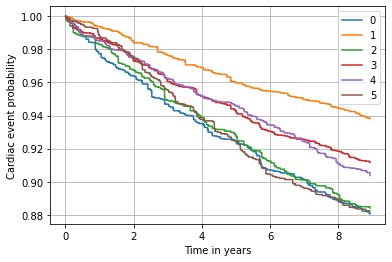

In [45]:
surv = model.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(model.event_times_, s, where="post", label=str(i))
plt.ylabel("Cardiac event probability")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)



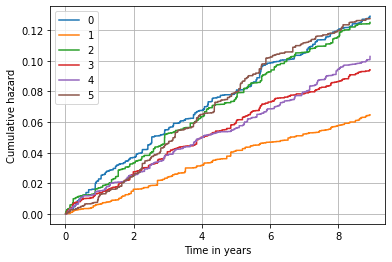

In [46]:
surv = model.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(model.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)

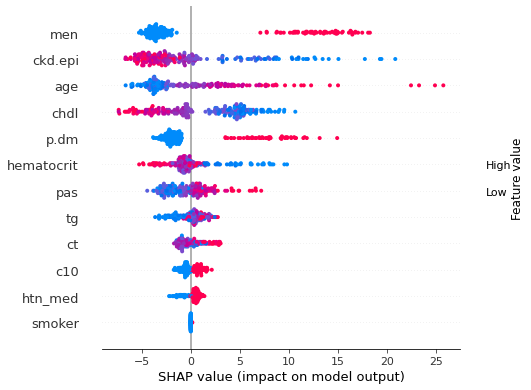

In [48]:
shap.summary_plot(shaps, X_valid[:200])
# C-stat = 0.76 amb 1000 individus
# C-stat = 0.66 amb 5000 individus

In [49]:
shap.initjs()

In [50]:
shap.plots.force(shaps[0])

In [53]:
shap.plots.force(shaps[1])

In [ ]:
shap.plots.force(shaps[2])

In [ ]:
shap.plots.force(shaps[3])

In [52]:
shap.plots.force(shaps[4])

In [ ]:
shap.plots.force(shaps[5])

In [56]:
age = input('age:')
men = input('sex (1 for men, 0 for women):')
smoker = input('smoker (1 is smoker, 0 not smoker):')
pdm = input ('diabetes (1 is diabetic, 0 is not):')
pas = input('pas:')
ct = input('ct:')
chdl = input('chdl:')
tg = input('tg:')
htn_med=input('hypertensive treatment (1 is being treated, 0 not):')
# charlson=input('charlson:')
ckdepi=input('renal function:')
c10 = input('lipid-lowering treatment (1 is being treated, 0 not):')
hematocrit = input('hematocrit:')

df2 = {'age': float(age),
       'men': float(men), 
       'smoker': float(smoker),
       'p.dm': float(pdm),
       'pas': float(pas),
       'ct': float(ct),
       'chdl': float(chdl),
       'tg':float(tg),
       'htn_med':float(htn_med),
       # 'charlson':float(charlson),
       'ckd.epi':float(ckdepi),
       'c10':float(c10),
       'hematocrit':float(hematocrit)}

X = X.append(df2, ignore_index = True)

shapvals = explainer(X[-1:])

shap.plots.force(shapvals[0])

age:100
sex (1 for men, 0 for women):1
smoker (1 is smoker, 0 not smoker):1
diabetes (1 is diabetic, 0 is not):1
pas:100
ct:100
chdl:100
tg:100
hypertensive treatment (1 is being treated, 0 not):1
renal function:100
lipid-lowering treatment (1 is being treated, 0 not):1
hematocrit:100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
Permutation explainer: 2it [00:18, 18.38s/it]                                   
